In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import shap
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.preprocessing import OneHotEncoder


In [51]:
data = pd.read_csv('process/restaurants_dataset_cleaned.csv')

In [52]:
df_categorical =data[["City_Tier","Restaurant Location","Endorsed By"]]
data_numerical = data.select_dtypes(include='number')

# Se codifican las variables categoricas para manejarlas como numericas. 

In [53]:
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded = encoder.fit_transform(df_categorical[["City_Tier", "Restaurant Location", "Endorsed By"]])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["City_Tier", "Restaurant Location", "Endorsed By"]))

   City_Tier_Other  City_Tier_Tier 1  City_Tier_Tier 2  City_Tier_Tier 3  \
0              0.0               1.0               0.0               0.0   
1              0.0               0.0               1.0               0.0   
2              0.0               1.0               0.0               0.0   
3              0.0               1.0               0.0               0.0   
4              0.0               1.0               0.0               0.0   

   Restaurant Location_Near Business Hub  Restaurant Location_Near Party Hub  \
0                                    1.0                                 0.0   
1                                    0.0                                 1.0   
2                                    1.0                                 0.0   
3                                    0.0                                 1.0   
4                                    0.0                                 1.0   

   Endorsed By_Local Celebrity  Endorsed By_Not Specific  \
0 

In [54]:
data = pd.concat([data_numerical, encoded_df], axis=1)

In [55]:
X = data.drop("Annual Turnover", axis=1)
y = data["Annual Turnover"]

# Selección de variables por importancia

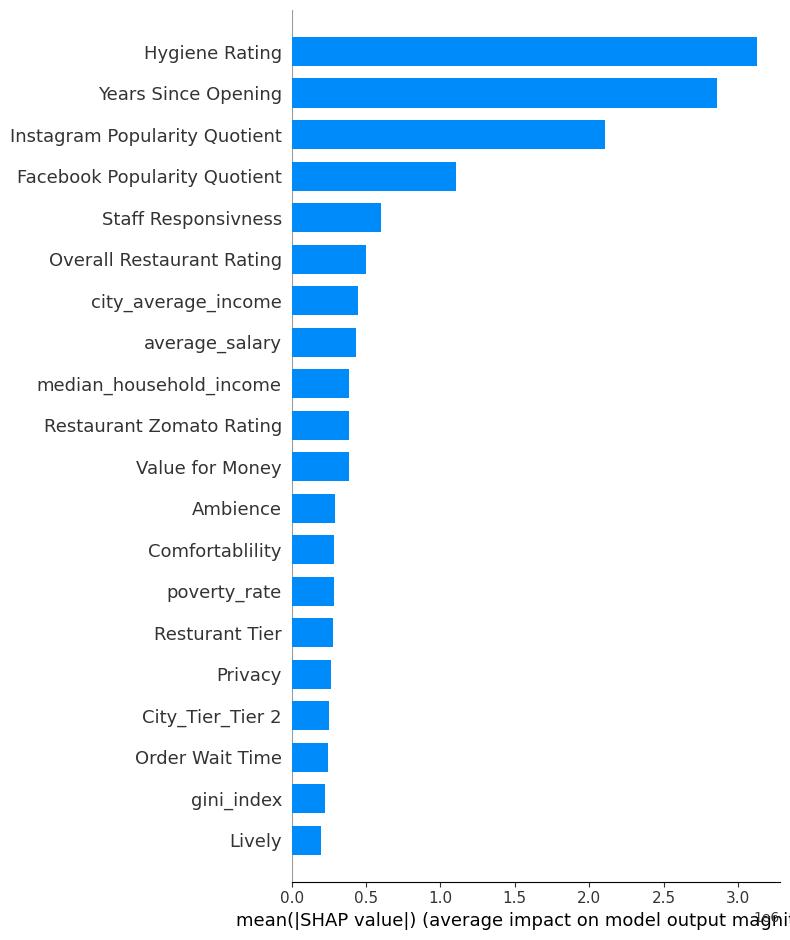

In [56]:
model = RandomForestRegressor()
model.fit(X, y)
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [57]:
data.to_csv('process/numerical_data.csv', index=False)

In [58]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Save the scaler for later use
joblib.dump(scaler, 'models_encoders/minmax_scaler.pkl')

['models_encoders/minmax_scaler.pkl']

In [59]:
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled_df = data_scaled_df.dropna()
data_scaled_df.to_csv('process/data_scaled.csv', index=False)
len(data_scaled_df)

2493

In [60]:
data_scaled = scaler.fit_transform(data[["Annual Turnover"]])
joblib.dump(scaler, 'models_encoders/minmax_scaler_y.pkl')


['models_encoders/minmax_scaler_y.pkl']

In [61]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X)
data_scaled = scaler.fit_transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled_df = data_scaled_df.dropna()
data_scaled_df.to_csv('process/data_scaled_robust.csv', index=False)
len(data_scaled_df)
# Save the scaler for later use
joblib.dump(scaler, 'models_encoders/robust_scaler.pkl')

data_scaled = scaler.fit_transform(data[["Annual Turnover"]])
joblib.dump(scaler, 'models_encoders/robust_scaler_y.pkl')

['models_encoders/robust_scaler_y.pkl']